In [4]:
import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [2]:
#load the csv file and convert to np.array
pd_shap = pd.read_csv('all_mean_shap.csv',
                      header=0,
                      index_col=0)

all_shap = pd.DataFrame.to_numpy(pd_shap)

#drop cols that contain all 0's
sum_rows = np.sum(all_shap[:,1:], axis=1)
used_cols = np.where(sum_rows != 0)[0]

all_shap = all_shap[used_cols]
print(pd.DataFrame(all_shap))

          0         1         2         3         4         5         6   \
0   0.653970  0.000000  0.017201  0.018608  0.017983  0.017036  0.018017   
1   0.835648  0.022874  0.023482  0.025749  0.000000  0.024165  0.026657   
2   0.941884  0.022320  0.024071  0.025893  0.026208  0.024458  0.000000   
3   1.037036  0.029820  0.031283  0.037455  0.033922  0.025323  0.043887   
4   1.019978  0.029450  0.031814  0.030267  0.037193  0.034435  0.037903   
5   0.988178  0.025178  0.026475  0.030184  0.027311  0.025581  0.033235   
6   0.934631  0.024552  0.026269  0.027940  0.026407  0.025390  0.029133   
7   0.917180  0.023460  0.024512  0.025961  0.025489  0.024297  0.024348   
8   0.870680  0.022470  0.024076  0.025804  0.024999  0.022669  0.026729   
9   0.910949  0.025772  0.026223  0.029460  0.027859  0.023225  0.028829   
10  0.997148  0.027474  0.029125  0.030863  0.029431  0.029907  0.030662   
11  1.155821  0.016056  0.006684  0.015513  0.004389  0.009168  0.020079   
12  1.162988

In [11]:
#this is the sum of the shap values for all channels
per_ch_impact = np.sum(all_shap[:,1:], axis=0)
print(per_ch_impact)

[0.46162635 0.46975065 0.46748427 0.47526685 0.50224348 0.46561413
 0.55469409 0.56994799 0.64648936 0.60338978 0.69307972 0.54309828
 0.55757013 0.4495083  0.47341162 0.45099001 0.48999631 0.48119001
 0.47262998 0.46179118 0.54663506 0.51028864 0.6465552  0.70309275
 0.42480051 0.47822539 0.54930735 0.55024247 0.63182321 0.63110312
 0.51856553 0.66842079 0.53158939 0.66818609 0.49986761 0.41311963
 0.40983248 0.44346649 0.43976759 0.49559591 0.64916228 0.81919895
 1.24836433 1.46336708]


In [9]:
raw_vals = pd.read_csv('y_val.csv',
                      header=None,
                      index_col=None)

raw_np = pd.DataFrame.to_numpy(raw_vals)
sum_ch = np.sum(raw_np, axis= 0)
denom = numpy.count_nonzero(raw_np, axis= 0)
avg_col_val = sum_ch/denom
print(avg_col_val)


[ 1.24653054  1.36700768  1.49669954  1.61967888  1.73556052  1.83728556
  1.92702899  1.98854878  2.00758367  2.01238523  1.98101125  1.93378096
  1.87160556  1.80615541  1.75144567  1.70526892  1.67956266  1.6765472
  1.70477946  1.76059546  1.84398988  1.94788834  2.06756335  2.17912861
  2.26998065  2.32360772  2.32674369  2.28518213  2.1964606   2.10136486
  2.01232116  1.95330833  1.94414556  2.02147669  2.21839849  2.56661035
  3.14561018  4.01079317  5.24052979  6.94440795  9.06880436 11.38715383
 13.46618815 14.8649651 ]


In [5]:
ch_names = np.arange(44).tolist()
freqs = np.arange(191.6, 195.9, 0.1).tolist()
for x in range(len(ch_names)):
  ch_names[x] = "Ch %.0f (%.1f)" % (ch_names[x], freqs[x])

In [6]:
np.argsort(shap_chnls, axis=0)[0,-10:] 

temp = np.argpartition(-shap_chnls, 10)
result_args = temp[:,:10]
#print(result_args)

count = np.bincount(result_args.flatten())
print(count)
#np.unique(result_args)

[ 0  0  0  0  2  2  5 11  7 11  9  4  7  3  3  0  2  2  1  1  8  6  8  6
  3 26 27 27 27 29 30 30 29 30 26  3  1  4  1  3  6  7 14 19]


<BarContainer object of 44 artists>

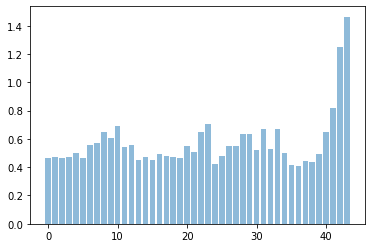

In [7]:
y_pos = np.arange(len(ch_names))

ch = 0
plt.bar(y_pos, np.sum(shap_chnls, axis=0), align='center', alpha=0.5)

#ch = 1
#plt.bar(y_pos, shap_chnls[ch], align='center', alpha=0.5)




In [8]:
all_shap[0,1:]

array([0.        , 0.01720051, 0.01860812, 0.01798305, 0.01703575,
       0.01801668, 0.01866769, 0.0217435 , 0.01184482, 0.02139052,
       0.02061058, 0.01871057, 0.01940041, 0.01818338, 0.01896258,
       0.0186179 , 0.01738747, 0.01953086, 0.01775904, 0.018669  ,
       0.0201799 , 0.02072652, 0.0150677 , 0.00938298, 0.00940596,
       0.01586273, 0.01162449, 0.00894041, 0.00876268, 0.02143643,
       0.02191837, 0.0190801 , 0.01872542, 0.00459146, 0.00824312,
       0.01187543, 0.01233644, 0.0072687 , 0.01783704, 0.00705344,
       0.00886221, 0.01207572, 0.02513013, 0.02038101])